# Regression model

* Import required libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

In [8]:
# import data
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
# Delete columns: car_ID, symboling
df.drop(["car_ID", "symboling"], axis=1, inplace=True)

* The "Car_name" column needs to be transformed into a more informative format.

In [10]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [12]:
df["CarName"] = df["CarName"].map(lambda x:x.split()[0])
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


* Cars should be grouped into a single category based on their brand, such as by continent.

In [13]:
def get_continent(car_name):
  if car_name in ['alfa-romero', 'audi', 'bmw','jaguar','peugeot','porsche',
       'porcshce','renault', 'saab','vokswagen', 'volkswagen', 'vw', 'volvo']:
       return "Europe"
  elif car_name in ['chevrolet', 'dodge', 'buick', 'mercury','plymouth']:
       return "USA"
  else:
       return "Asia"

df['CarName'] = df['CarName'].map(get_continent)
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,Europe,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,Europe,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,Europe,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,Europe,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,Europe,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Change CarName to Continent
df.rename(columns = {'CarName': "Continent"}, inplace=True)
df.head()

,Continent,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,Europe,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,Europe,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,Europe,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,Europe,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,Europe,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


* To build a regression model, all data must be numerical. Let's check the data types of the dataset.

In [17]:
print(df.dtypes)

Continent            object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


* fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem: 
These columns are of object type and need to be converted into numerical format:

I used ANOVA and t-test to identify the significance of each object-type attribute and encoded them accordingly based on their importance. If an attribute was not significant, I applied Label Encoding. However, I did not remove it from the model, as it could still be important in combination with other attributes.

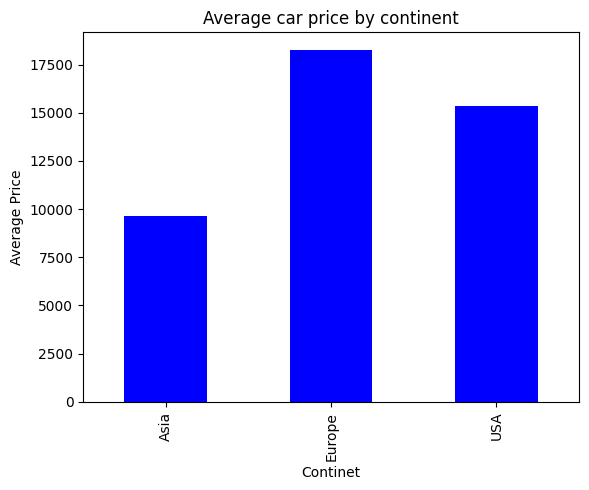

F-statistic: 33.7695
P-value: 0.0000
 There is a statistically significant difference in car prices across continents!


In [18]:
Average_Price = df.groupby('Continent')['price'].mean()
Average_Price.plot(kind = 'bar', x= 'Continent',y= Average_Price, color='blue')
plt.xlabel("Continet")
plt.ylabel("Average Price")
plt.title("Average car price by continent")
plt.show()

# Dividing data by continent
asia_prices = df[df['Continent'] == 'Asia']['price']
europe_prices = df[df['Continent'] == 'Europe']['price']
usa_prices = df[df['Continent'] == 'USA']['price']

# Performing ANOVA test
f_statistic, p_value = stats.f_oneway(asia_prices, europe_prices, usa_prices)

# Displaying results
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Making a decision
alpha = 0.05
if p_value < alpha:
    print(" There is a statistically significant difference in car prices across continents!")
else:
    print(" There is no statistically significant difference.")

* The ANOVA test showed a statistically significant difference
* so the continent values will be encoded as follows: Asia = 0, USA = 1, Europe = 2.

#Let's check the other columns.

In [19]:
# fueltype
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

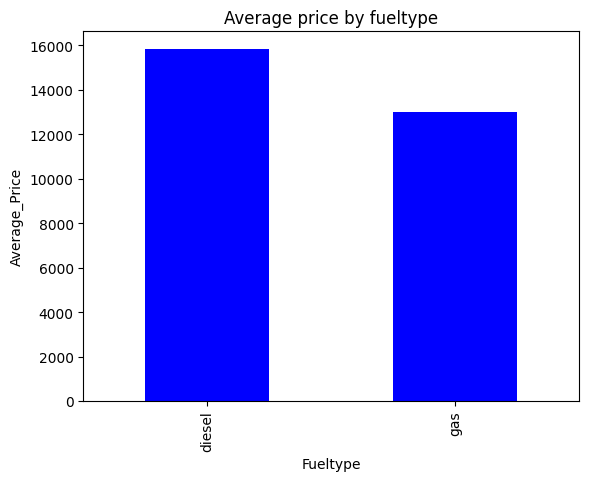

t-statistic: 1.5142
P-value: 0.1315
 There is no statistically significant difference.


In [22]:
# The "fueltype" column has two values, so it is better to use the independent t-test.
Average_Price = df.groupby('fueltype')['price'].mean()
Average_Price.plot(kind = 'bar', x = 'fueltype',y= Average_Price, color= 'blue')
plt.xlabel("Fueltype")
plt.ylabel("Average_Price")
plt.title("Average price by fueltype")
plt.show()

#Dividing by fuel type.
diesel_prices = df[df['fueltype'] == 'diesel']['price']
gas_prices = df[df['fueltype'] == 'gas']['price']


# the independent t-test
t_stat, p_value = ttest_ind(diesel_prices, gas_prices)

# Displaying results
print(f"t-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Making a decision
alpha = 0.05
if p_value < alpha:
    print(" There is a statistically significant difference in car prices based on fuel type!")
else:
    print(" There is no statistically significant difference.")


In [21]:
# aspiration
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

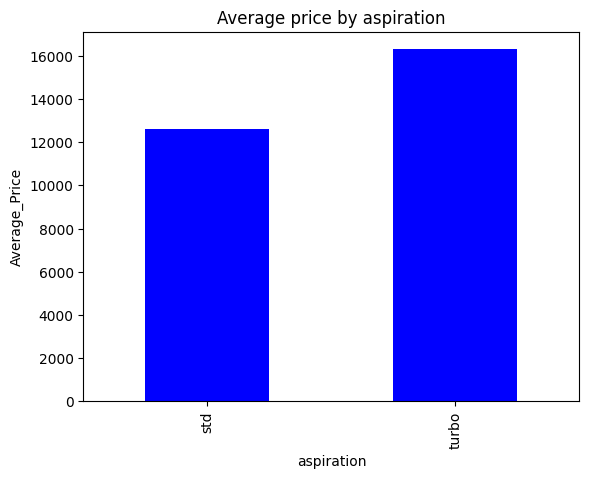

t-statistic: -2.5762
P-value: 0.0107
 There is a statistically significant difference in car prices based on aspiration!


In [23]:
Average_Price = df.groupby('aspiration')['price'].mean()
Average_Price.plot(kind = 'bar', x = 'aspiration',y= Average_Price, color= 'blue')
plt.xlabel("aspiration")
plt.ylabel("Average_Price")
plt.title("Average price by aspiration")
plt.show()

# Dividing data by aspiration
std_prices = df[df['aspiration'] == 'std']['price']
turbo_prices = df[df['aspiration'] == 'turbo']['price']


# the independent t-test 
t_stat, p_value = ttest_ind(std_prices, turbo_prices)

# Displaying results
print(f"t-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Making a decision
alpha = 0.05
if p_value < alpha:
    print(" There is a statistically significant difference in car prices based on aspiration!")
else:
    print(" There is no statistically significant difference.")

* The independent t test showed a statistically significant difference
* So the aspiration values will be encoded as follows: std=0. turbo=1

In [24]:
# doornumber
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

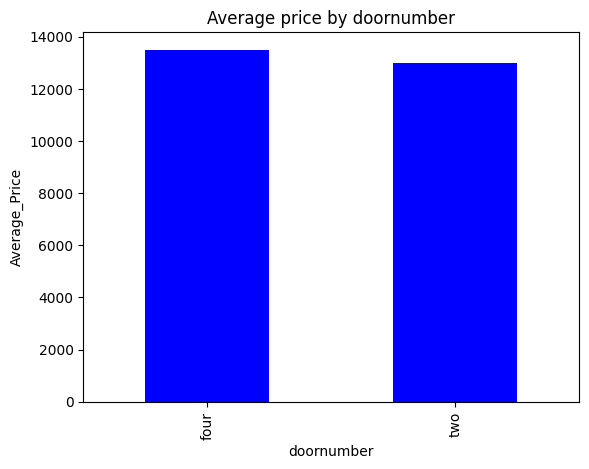

t-statistic: 0.4538
P-value: 0.6504
 There is no statistically significant difference..


In [26]:
Average_Price = df.groupby('doornumber')['price'].mean()
Average_Price.plot(kind = 'bar', x = 'doornumber',y= Average_Price, color= 'blue')
plt.xlabel("doornumber")
plt.ylabel("Average_Price")
plt.title("Average price by doornumber")
plt.show()

# Dividing data by doornumber
fourdoor_prices = df[df['doornumber'] == 'four']['price']
twodoor_prices = df[df['doornumber'] == 'two']['price']


# the independent t-test 
t_stat, p_value = ttest_ind(fourdoor_prices, twodoor_prices)

# Displaying results
print(f"t-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Making a decision
alpha = 0.05
if p_value < alpha:
    print(" There is a statistically significant difference in car prices based on the number of doors!")
else:
    print(" There is no statistically significant difference..")

In [27]:
# Carbody
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

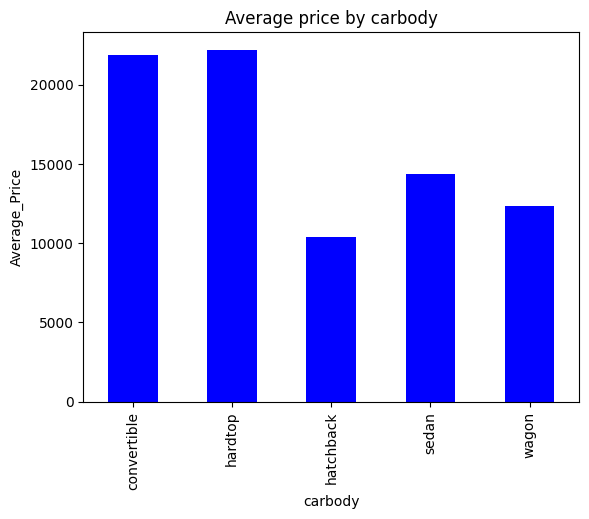

F-statistic: 8.0320
P-value: 0.0000
 There is a statistically significant difference in car prices based on carbody!


In [28]:
Average_Price = df.groupby('carbody')['price'].mean()
Average_Price.plot(kind = 'bar', x = 'carbody',y= Average_Price, color= 'blue')
plt.xlabel("carbody")
plt.ylabel("Average_Price")
plt.title("Average price by carbody")
plt.show()

convertible_prices = df[df['carbody'] == 'convertible']['price']
hardtop_prices = df[df['carbody'] == 'hardtop']['price']
hatchback_prices = df[df['carbody'] == 'hatchback']['price']
sedan_prices = df[df['carbody'] == 'sedan']['price']
wagon_prices = df[df['carbody'] == 'wagon']['price']

# Performing ANOVA test
f_statistic, p_value = stats.f_oneway(convertible_prices,hardtop_prices,hatchback_prices,sedan_prices,wagon_prices)

# Displaying results
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Making a decision
alpha = 0.05
if p_value < alpha:
    print(" There is a statistically significant difference in car prices based on carbody!")
else:
    print(" There is no statistically significant difference.")

* The ANOVA test showed a statistically significant difference
* so the carbody values will be encoded as follows: hatchback=0, wagon=1, sedan=2, convertible=3, hardtop=4

In [29]:
# drivewheel
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

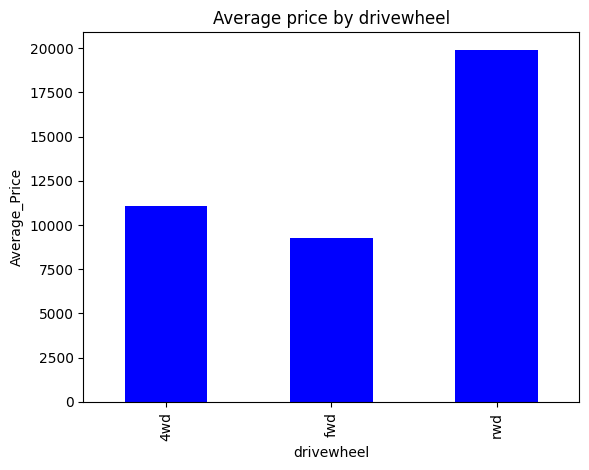

F-statistic: 70.3206
P-value: 0.0000
 There is a statistically significant difference in car prices based on drivewheel!


In [30]:
Average_Price = df.groupby('drivewheel')['price'].mean()
Average_Price.plot(kind = 'bar', x = 'drivewheel',y= Average_Price, color= 'blue')
plt.xlabel("drivewheel")
plt.ylabel("Average_Price")
plt.title("Average price by drivewheel")
plt.show()


# Dividing data by drivewheel
rwd_prices = df[df['drivewheel'] == 'rwd']['price']
fwd_prices = df[df['drivewheel'] == 'fwd']['price']
fourwd_prices = df[df['drivewheel'] == '4wd']['price']


# Performing ANOVA test
f_statistic, p_value = stats.f_oneway(rwd_prices,fwd_prices, fourwd_prices)

# Displaying results
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Making a decision
alpha = 0.05
if p_value < alpha:
    print(" There is a statistically significant difference in car prices based on drivewheel!")
else:
    print(" There is no statistically significant difference.")

* The ANOVA test showed a statistically significant difference
* So the drivewheel values will be encoded as follows: fwd=0; 4wd=1, rwd=2

In [31]:
# enginelocation
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

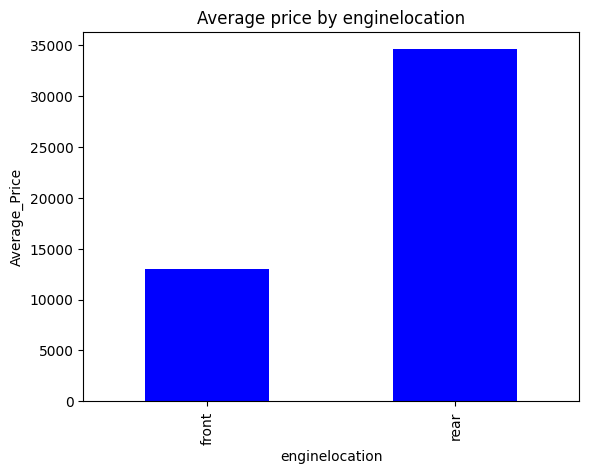

t-statistic: nan
P-value: nan
 There is no statistically significant difference.


In [32]:
Average_Price = df.groupby('enginelocation')['price'].mean()
Average_Price.plot(kind = 'bar', x = 'enginelocation',y= Average_Price, color= 'blue')
plt.xlabel("enginelocation")
plt.ylabel("Average_Price")
plt.title("Average price by enginelocation")
plt.show()

# Dividing data by enginelocation
front_prices = df[df['enginelocation'] == 'front']['price']
near_prices = df[df['enginelocation'] == 'near']['price']


# The independent t-test 
t_stat, p_value = ttest_ind(front_prices, near_prices)

# Displaying results
print(f"t-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Making a decision
alpha = 0.05
if p_value < alpha:
    print(" There is a statistically significant difference in car prices based on enginelocation!")
else:
    print(" There is no statistically significant difference.")

In [33]:
# enginetype
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

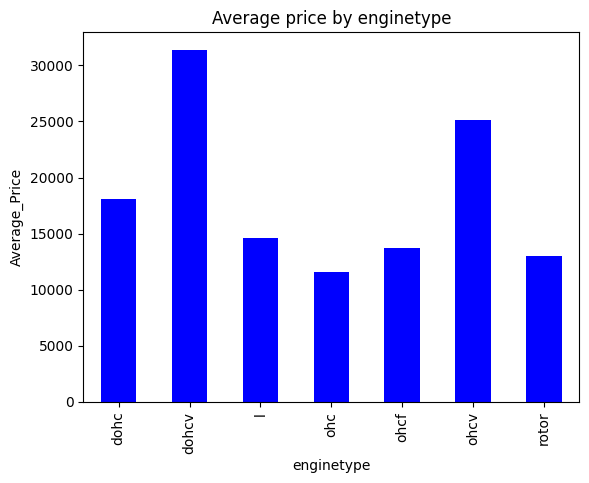

F-statistic: nan
P-value: nan
 There is no statistically significant difference.


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [34]:
Average_Price = df.groupby('enginetype')['price'].mean()
Average_Price.plot(kind = 'bar', x = 'enginetype',y= Average_Price, color= 'blue')
plt.xlabel("enginetype")
plt.ylabel("Average_Price")
plt.title("Average price by enginetype")
plt.show()


# Dividing data by enginetype
dohc_prices = df[df['enginetype'] == 'dohc']['price']
ohcv_prices = df[df['enginetype'] == 'ohcv']['price']
ohc_prices = df[df['enginetype'] == 'ohc']['price']
one_prices = df[df['enginetype'] == '1']['price']
rotor_prices = df[df['enginetype'] == 'rotor']['price']
ohcf_prices = df[df['enginetype'] == 'ohcf']['price']
dohcv_prices = df[df['enginetype'] == 'dohcv']['price']


# Performing ANOVA test
f_statistic, p_value = stats.f_oneway(dohc_prices,ohcv_prices,ohc_prices,one_prices,rotor_prices,ohcf_prices,dohcv_prices)

# Displaying results
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Making a decision
alpha = 0.05
if p_value < alpha:
    print(" There is a statistically significant difference in car prices based on drivewheel!")
else:
    print(" There is no statistically significant difference.")

In [35]:
# cylindernumber
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

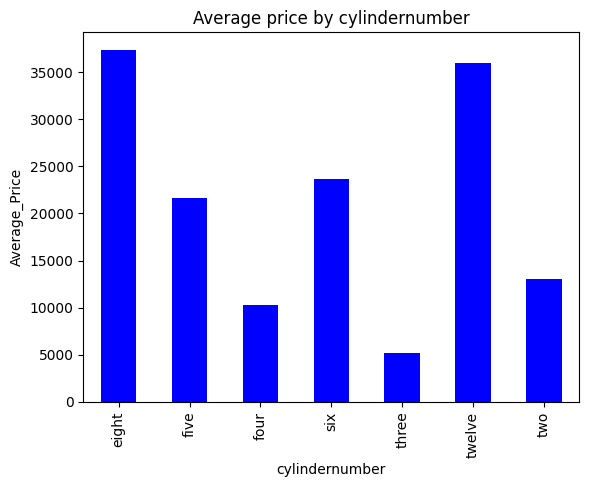

F-statistic: 57.5689
P-value: 0.0000
 There is a statistically significant difference in car prices based on cylindernumber!


In [36]:
Average_Price = df.groupby('cylindernumber')['price'].mean()
Average_Price.plot(kind = 'bar', x = 'cylindernumber',y= Average_Price, color= 'blue')
plt.xlabel("cylindernumber")
plt.ylabel("Average_Price")
plt.title("Average price by cylindernumber")
plt.show()

# Dividing data by ylindernumber
four_prices = df[df['cylindernumber'] == 'four']['price']
six_prices = df[df['cylindernumber'] == 'six']['price']
five_prices = df[df['cylindernumber'] == 'five']['price']
three_prices = df[df['cylindernumber'] == 'three']['price']
twelve_prices = df[df['cylindernumber'] == 'twelve']['price']
two_prices = df[df['cylindernumber'] == 'two']['price']
eight_prices = df[df['cylindernumber'] == 'eight']['price']


# Performing ANOVA test
f_statistic, p_value = stats.f_oneway(four_prices,six_prices,five_prices,three_prices,twelve_prices,two_prices,eight_prices)

# Displaying results
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Making a decision
alpha = 0.05
if p_value < alpha:
    print(" There is a statistically significant difference in car prices based on cylindernumber!")
else:
    print(" There is no statistically significant difference.")

* The ANOVA test showed a statistically significant difference
* So the drivewheel values will be encoded as follows: two=0, three=1, four=2, five=3, six=4, eight=5, twelve=6

In [37]:
# fuelsystem
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

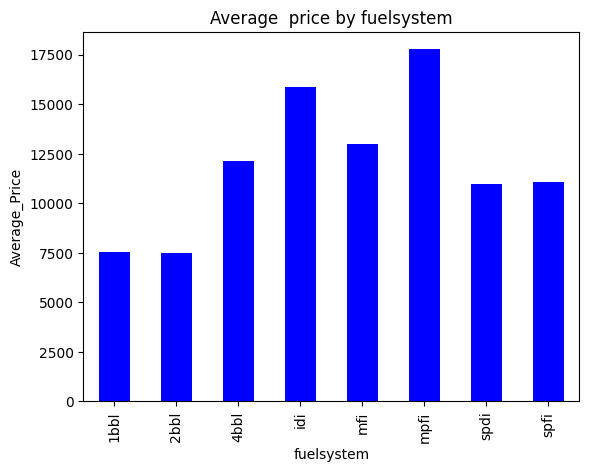

F-statistic: 15.6419
P-value: 0.0000
 There is a statistically significant difference in car prices based on drivewheel!


In [39]:
Average_Price = df.groupby('fuelsystem')['price'].mean()
Average_Price.plot(kind = 'bar', x = 'fuelsystem',y= Average_Price, color= 'blue')
plt.xlabel("fuelsystem")
plt.ylabel("Average_Price")
plt.title("Average  price by fuelsystem")
plt.show()

# Dividing data by drivewheel 
mpfi_prices = df[df['fuelsystem'] == 'mpfi']['price']
twobbl_prices = df[df['fuelsystem'] == '2bbl']['price']
mfi_prices = df[df['fuelsystem'] == 'mfi']['price']
onebbl_prices = df[df['fuelsystem'] == '1bbl']['price']
spfi_prices = df[df['fuelsystem'] == 'spfi']['price']
fourbbl_prices = df[df['fuelsystem'] == '4bbl']['price']
idi_prices = df[df['fuelsystem'] == 'idi']['price']
spdi_prices = df[df['fuelsystem'] == 'spdi']['price']

# Performing ANOVA test
f_statistic, p_value = stats.f_oneway(mpfi_prices,twobbl_prices,mfi_prices,onebbl_prices,
                                      spfi_prices,fourbbl_prices,idi_prices,spdi_prices)

# Displaying results
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Making a decision
alpha = 0.05
if p_value < alpha:
    print(" There is a statistically significant difference in car prices based on drivewheel!")
else:
    print(" There is no statistically significant difference.")

* The ANOVA test showed a statistically significant difference
* So the fuelsystem values will be encoded as follows: 1bbl= 0, 2bbl=1,spdi=2, spfi=3, 4bbl=4, mfi=5, idi=6, mpfi=7

#Data encoding

In [40]:
# Encoding the data that are statistically significant.
continent_mapping = {'Asia': 0, 'USA': 1, 'Europe': 2}
aspiration_mapping = {'std': 0, 'turbo': 1}
carbody_mapping = {'hatchback': 0, 'wagon': 1, 'sedan': 2, 'convertible': 3, 'hardtop': 4}
drivewheel_mapping = {'fwd': 0, '4wd': 1, 'rwd': 2}
cylindernumber_mapping = {'three': 0, 'four': 1, 'two': 2, 'five': 3, 'six': 4, 'eight': 5, 'twelve': 6}
fuelsystem_mapping = {'1bbl': 0, '2bbl': 1, 'spdi': 2, 'spfi': 3, '4bbl': 4, 'mfi': 5, 'idi': 6, 'mpfi': 7}

df['Continent'] = df['Continent'].map(continent_mapping)
df['aspiration'] = df['aspiration'].map(aspiration_mapping)
df['carbody'] = df['carbody'].map(carbody_mapping)
df['drivewheel'] = df['drivewheel'].map(drivewheel_mapping)
df['cylindernumber'] = df['cylindernumber'].map(cylindernumber_mapping)
df['fuelsystem'] = df['fuelsystem'].map(fuelsystem_mapping)


# Encoding the data that are not statistically significant.
mylabel =LabelEncoder()
for col in df.columns:
  if df[col].dtype =='object':
    df[col] =mylabel.fit_transform(df[col])


df.head()


,Continent,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,3,2,0,88.6,168.8,64.1,...,130,7,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,1,0,1,3,2,0,88.6,168.8,64.1,...,130,7,3.47,2.68,9.0,111,5000,21,27,16500.0
2,2,1,0,1,0,2,0,94.5,171.2,65.5,...,152,7,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,2,0,0,99.8,176.6,66.2,...,109,7,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,2,1,0,99.4,176.6,66.4,...,136,7,3.19,3.40,8.0,115,5500,18,22,17450.0


## Building the regression model.

*  Split the data into the target variable - y and feature variables- X.

In [41]:
y = df['price'].values
X = df.drop('price',axis=1).values

* Split X into training and testing sets.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

* Linear regression.

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

* Model evaluation

In [45]:
print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test,y_test))

train score: 0.9097862995523783
test score: 0.7841881397757158


* The significant difference between the training score (0.9098) and the test score (0.7842) indicates potential overfitting.

* Use Random Forest regression to improve the model and reduce overfitting.

In [46]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Evaluation
train_score = rf_regressor.score(X_train, y_train)
test_score = rf_regressor.score(X_test, y_test)

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

Train Score: 0.9899
Test Score: 0.9098


* Train score 0.9899 and Test score 0.9098. rf_regressor model fits well on training data, there was some potential for overfitting, as the test score was significantly lower.

Cross-Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

mse_scores = -cv_scores  # Cross-validation returns negative MSE
print(f"Cross-Validation MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}")

cv_scores_rf = cross_val_score(rf_regressor, X, y, cv=10, scoring='neg_mean_squared_error')

# Mean Squared Error (MSE)
mse_scores_rf = -cv_scores_rf  # Cross-validation returns negative MSE
print(f"Random Forest Cross-Validation MSE: {mse_scores_rf.mean():.4f} ± {mse_scores_rf.std():.4f}")

Cross-Validation MSE: 9691921.5853 ± 4272000.9206
Random Forest Cross-Validation MSE: 9487061.5896 ± 7326458.0523


The Random Forest model has a lower mean MSE than the generic model, indicating it is better suited for the data at hand. However, the high standard deviation in the Random Forest model suggests that further investigation

In [48]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# best parameters
print(grid_search.best_params_)
best_rf = grid_search.best_estimator_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
best_rf = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

best_rf.fit(X_train, y_train)

# Evaluation
train_score = best_rf.score(X_train, y_train)
test_score = best_rf.score(X_test, y_test)

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

Train Score: 0.9831
Test Score: 0.9053


* the test score is still significantly lower.

* Take a look at and evaluate the feature importance.

In [50]:
feature_names = df.drop(columns=['price']).columns


X_train_df = pd.DataFrame(X_train, columns=feature_names)


coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Random Forest Feature Importances": best_rf.feature_importances_
})

print(coef_df)

             Feature  Random Forest Feature Importances
0          Continent                           0.003057
1           fueltype                           0.000265
2         aspiration                           0.000656
3         doornumber                           0.000415
4            carbody                           0.001690
5         drivewheel                           0.001363
6     enginelocation                           0.000019
7          wheelbase                           0.010840
8          carlength                           0.004950
9           carwidth                           0.018132
10         carheight                           0.003542
11        curbweight                           0.174884
12        enginetype                           0.002010
13    cylindernumber                           0.005774
14        enginesize                           0.667044
15        fuelsystem                           0.003076
16         boreratio                           0

* The features fueltype (0.000265), aspiration (0.0006563), doornumber (0.000415), and enginelocation (0.000019) exhibit very low importance values. Remove them from the model.

In [51]:
car = df.drop(columns=["fueltype", "aspiration", "doornumber", "enginelocation"], axis=1)
car.head()

,Continent,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,3,2,88.6,168.8,64.1,48.8,2548,0,1,130,7,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,2,88.6,168.8,64.1,48.8,2548,0,1,130,7,3.47,2.68,9.0,111,5000,21,27,16500.0
2,2,0,2,94.5,171.2,65.5,52.4,2823,5,4,152,7,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,2,0,99.8,176.6,66.2,54.3,2337,3,1,109,7,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,2,1,99.4,176.6,66.4,54.3,2824,3,3,136,7,3.19,3.40,8.0,115,5500,18,22,17450.0


* uild a new model with the reduced set of features.

In [52]:
y = car["price"].values
X = car.drop("price",axis=1).values

In [53]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state= 42)

In [54]:
newmodel = LinearRegression()
newmodel.fit(X_train,y_train)
print("test score:",newmodel.score(X_test,y_test))
print("train score:", newmodel.score(X_train, y_train))

test score: 0.8332795119320721
train score: 0.8918264532955983


In [55]:
# Initialize and fit the Random Forest Regressor
new_rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
new_rf_regressor.fit(X_train, y_train)

train_score = new_rf_regressor.score(X_train, y_train)
test_score = new_rf_regressor.score(X_test, y_test)

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

Train Score: 0.9848
Test Score: 0.9610


In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(newmodel, X, y, cv=kf, scoring='neg_mean_squared_error')

mse_scores = -cv_scores  # Cross-validation returns negative MSE
print(f"Cross-Validation MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}")

cv_scores_rf = cross_val_score(new_rf_regressor, X, y, cv=10, scoring='neg_mean_squared_error')

# Mean Squared Error (MSE)
mse_scores_rf = -cv_scores_rf  # Cross-validation returns negative MSE
print(f"Random Forest Cross-Validation MSE: {mse_scores_rf.mean():.4f} ± {mse_scores_rf.std():.4f}")

Cross-Validation MSE: 10419465.7430 ± 5000227.0528
Random Forest Cross-Validation MSE: 9678443.7908 ± 7487021.6392


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


print(grid_search.best_params_)
new_best_rf = grid_search.best_estimator_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [58]:
new_best_rf = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

new_best_rf.fit(X_train, y_train)

# Evaluation
train_score = new_best_rf.score(X_train, y_train)
test_score = new_best_rf.score(X_test, y_test)

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

Train Score: 0.9760
Test Score: 0.9563


In [ ]:
new_cv_scores_rf_new = cross_val_score(new_best_rf, X, y, cv=10, scoring='neg_mean_squared_error')


new_mse_scores_rf_new = -new_cv_scores_rf_new  # Cross-validation returns negative MSE
print(f"Random Forest Cross-Validation MSE: {new_mse_scores_rf_new.mean():.4f} ± {new_mse_scores_rf_new.std():.4f}")

Random Forest Cross-Validation MSE: 9600940.7051 ± 7278939.7705


* **new_rf_regressor**  has a higher Train Score (0.9848) compared to the **new_best_rf** (0.9760). A higher Train Score indicates better fitting to the training data.
* **new_rf_regressor** also has a slightly higher Test Score (0.9610) compared to the **new_best_rf** (0.9563). This indicates better performance on the test data for the first model.
* The Random Forest Cross-Validation MSE in the **new_best_rf** (9,600,940.71) is lower than that in **new_rf_regressor** (9,678,443.79), indicating that the second model may generalize better to unseen data despite having a slightly lower Train and Test Score.
* Since the difference in scores between the two models is small, we can choose the **new_best_rf**.